#### CMSE 202 Final Project - Fraudulent Credit Transactions Detection
### &#9989; Alice Shirley, Isaac Langerman, Khang Nguyen, Cale Mitchell
### &#9989; Section_001 - Dr. Yang
#### &#9989; 04/09/2024
[Our Final Project 'Fraud-Detect-Final' Repository](https://github.com/shirle21/Fraud-Detect-Final.git)

## Reasearch Question: 

# What is the best model to detect Credit Fraud using existing datasets?

##  **Abstract**


Credit fraud is a form of identity theft in which the victim’s credit card is used for unauthorized transactions, presenting a considerable menace to both consumers and financial institutions. In 2019, the Federal Trade Commission (FTC) reported over 270,000 cases of new or existing account fraud in the United States alone [1], with an estimated 151 million Americans affected annually [2]. In this project, we investigated and implemented different machine learning methods to answer the question: “What model is the best at detecting fraudulent transactions?”. We will use scikit-learn, statsmodels machine-learning library, seaborn, pandas, numpy, and matplotlib. The data was collected during a research collaboration of Worldline and ULB (Université Libre de Bruxelles) [3]. In this project, four machine learning models are employed: Logistic Regression, Principal Component Analysis (PCA), Naive Bayes Classifier, and Random Forest.

First, Logistic Regression, a method for binary classification purposes, is used to examine patterns and model the probability of a specific outcome in credit card transactions. For this model, the methodology was as follows: Import necessary items, complete three tests, find the best model from those tests, and compare/contrast tests to find the effectiveness of this model. The three tests were 1. Class vs All features, 2. Class vs Statistically Significant Features, and 3. Class vs Amount. Through this, I found Test 2 was the best as it has the greatest accuracy score (.992) and the greatest percentage of correctly identified fraudulent transactions (63.5%). However, this is not a very high percentage. Another drawback of this model was that accuracy was not a good metric. While Test 3 had an accuracy score of .998, it did not classify any of the fraudulent values correctly. Overall, using a log-reg model in the real world to identify fraudulent transactions is not very effective, and therefore this model presents itself as the weakest of the models we trained and tested. 

Second, Principal Component Analysis is used to transform high-dimensional credit transaction data into a lower-dimensional space. In this analysis, we utilized three rounds of PCA all run on the same data set. After three rounds of PCA and filtering out outliers with varying thresholds, we found around 600 very potentially fraudulent results. The credit cards that are screened out during the second round (around 4,000) will be shut down while the cardholder is notified. The credit cards that are screened out during the third round (606) will be even more urgently shut down and notified. In scenarios as serious as credit card transactions I believe that it is best to air on the side of caution. By stopping and notifying cardholders in both rounds we ensure that there is a very small probability that fraudulent cases get through. I know we are airing on the side of caution because there are only around 490 frauds out of 284,807 transactions. This gives us an accuracy rating in the third round of around 81.1%.  

Third, Naive Bayes Classifier, a probabilistic algorithm based on Bayes' theorem, classifies credit card transactions as either legitimate or fraudulent. The Naive Bayes classifier works by comparing the conditional probabilities of A and B, in our case fraud or not fraud, to the probability of A. By doing this it assumes that each class could be responsible for predicting fraud.  The model has an accuracy of around .97 and correctly identifies about 90% of all actual fraudulent transactions.


Lastly, Random Forest, an ensemble learning method based on decision trees, is robust for detecting credit fraud by aggregating predictions from multiple decision trees to reduce overfitting and improve accuracy. The model achieved an accuracy of 99.96%, indicating its effectiveness in classifying transactions. It captured 82.35% of fraudulent transactions and correctly identified fraud 92.56% of the time.

In conclusion, the random forest model has the strongest performance due to its high accuracy, robustness to overfitting, and ability to handle large and complex datasets. Our study underscores the importance of employing machine-learning techniques for effective credit fraud detection, safeguarding consumers, preserving trust in financial systems. All the notebook and data will be uploaded to the GitHub directory: https://github.com/shirle21/Fraud-Detect-Final. 


## **Background and Motivation**

- Credit fraud is a type of identity theft, where the perpetrator borrows money/purchases goods with the use of someone else’s credit details 
- According to the FTC, more than 270,000 Americans reported new or existing account fraud in 2019 [1].
- It is estimated that 151 million Americans are affected by Credit Fraud each year [2].
- Being able to detect Credit Fraud is important because credit card companies should be able recognize fraudulent credit card transactions so clients can be refunded.
- There are many different ways to detect fraudulent credit transactions. The four we choose to investigate are Logistic Regression, PCA, Naive Bayes Classifier, and Random Forrest.
- From these four, we will determine what model is most useful.

## **Methodology**

### General Methodology
1. Find a dataset to use across four models to detect credit fraud
2. Clean the dataset for each specific models needs
3. Use supervised machine learning with PCA (Principal component analysis), Random Forest, Naive Bayes Classifier, and Logistic Regression
4. Compare/contrast the results to determine which model is the best





### Dataset

The data was collected during a research collaboration of Worldline and ULB (Université Libre de Bruxelles) on big data mining and fraud detection [3]. These are the characteristics of the dataset:
- Collected during a research collaboration of Worldline and ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
- 284,807 transactions from a period of 2 days
- Columns are numeric input variables  from a PCA transformation.
- V1 - V28 are components obtained with PCA
- Amount is the transaction Amount,
- Time'is the seconds between each transaction and the first transaction in the dataset.
- Class is a boolean value where 1 indicates fraud and 0 indicates no fraud



To analyze and preprocess the data, the seaborn, pandas, and matplotlib libraries were used. For modeling, machine learning scikit-learn library and statsmodels library were used. The data representation and visualization are graphed in different sections in this project.

Import necessary libraries:

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
import pandas as pd
import seaborn as sns 
from sklearn.metrics import accuracy_score
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, auc,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec
import math
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


### Dataset Exploration 

In [9]:
#loading in dataset - **note - too big to upload to github**
df1 = pd.read_csv('creditfraud1.csv')

#Amount of non-fraud and fraud entries in dataframe
mask0, mask1 = (df1['Class'] == 0), (df1['Class'] == 1)
print('Non-Fraudulent Entries:', len(df1[mask0]['Class'])/len(df1['Class']) * 100, '%')
print('Fraudulent Entries:', len(df1[mask1]['Class'])/len(df1['Class']) * 100, '%')

Non-Fraudulent Entries: 99.82725143693798 %
Fraudulent Entries: 0.1727485630620034 %


In [10]:
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0, 0.5, 'Count')

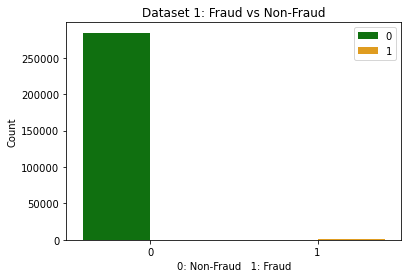

In [5]:

#bar plot for fraud vs no fraud data
sns.barplot(x=df1['Class'].value_counts().index, y=df1['Class'].value_counts(), hue=df1['Class'].value_counts().index, palette=['green', 'orange'])
plt.title('Dataset 1: Fraud vs Non-Fraud')
plt.xlabel('0: Non-Fraud   1: Fraud')
plt.ylabel('Count')

We can see the low occurrence of fraud compared to legitimate transactions in the dataset. Credit card fraud is a relatively rare event, with only a small fraction of transactions being flagged as fraudulent, posing difficulty in developing model and algorithms to detect the credit card fraud. We have to come up with appropriate models to analyze various features associated with each transaction and identify patterns indicative of fraudulent activity. 

In [11]:
null_table = pd.DataFrame(df1.isnull().sum()/len(df1)*100, index=df1.columns, columns=["null ratio"])
null_table

,null ratio
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


There is no null value in the dataset

median amount - no fraud: 22.0
median amount - fraud: 9.25


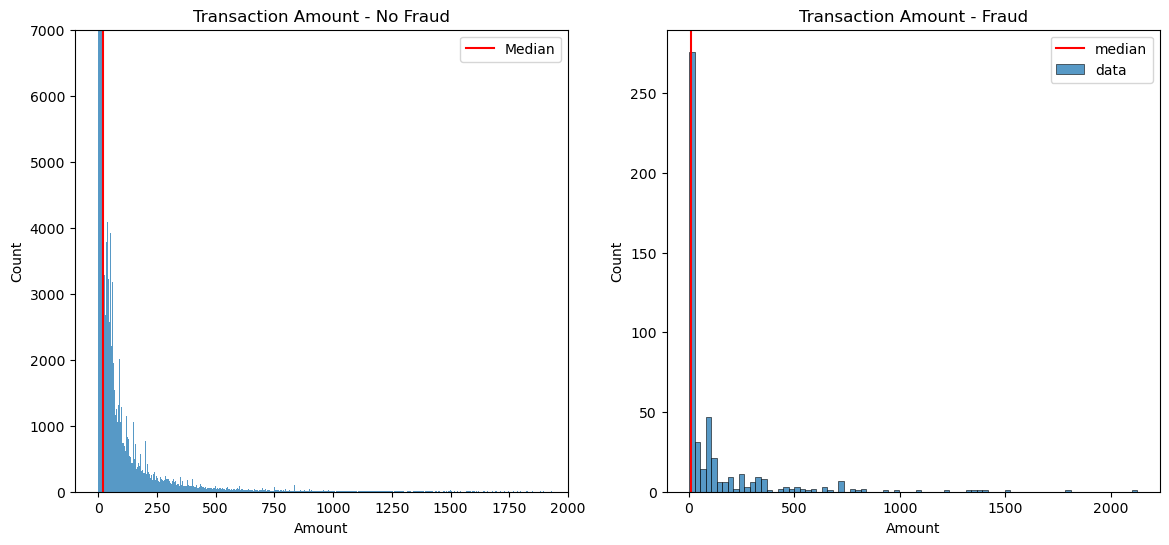

In [85]:
#amount of transactions for fraudulent and non-fraudulent data - histograms
df1_nofraud = df1[mask0]
df1_fraud = df1[mask1]

#making subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

#plot 1 
sns.histplot(data=df1_nofraud['Amount'], ax=axes[0])
axes[0].axvline(x=np.median(df1_nofraud['Amount']), color='r', linestyle='-', label='Median')
axes[0].set_ylim(0, 7000)
axes[0].set_xlim(-100, 2000)
axes[0].set_title('Transaction Amount - No Fraud')
axes[0].legend()

#plot 2 
sns.histplot(data = df1_fraud['Amount'], ax=axes[1])
axes[1].axvline(x= np.median(df1_fraud['Amount']), color='r', linestyle='-')
axes[1].set_title('Transaction Amount - Fraud')
axes[1].legend(['median','data'])

print( 'median amount - no fraud:',np.median(df1_nofraud['Amount'])) 
print('median amount - fraud:', np.median(df1_fraud['Amount']))

### Exploring Different Models

### Model 1: Logistic Regression

**Log-Reg Methodology**
- Import necessary items
- Test 1 : Model Class(Fraud/Non Fraud) vs all other columns in dataset
- Test 2 : Model Class(Fraud/Non Fraud) vs statistically significant figures
- Test 3 : Model Class(Fraud/Non Fraud) vs Amount variable
- For every Test
    - get train/test vectors, train/test labels with train_test_split
    - set test size to 25% and train to 75%
    - add constant to train vectors to create a logistic regression model using train labels and train vector w/constant
    - fit/display result
    - create confusion matrix [4] and find accuracy score
- compare/contrast tests

**Test 1**

In [12]:
#logistic regression model 1 
#class vs all factors 
classdf1= df1['Class']
#features = df1[feature names]
features = df1[df1.iloc[:, 1:30].columns]

#getting train and testing vectors, train and test labels
train_vectors, test_vectors, train_labels, test_labels = train_test_split(features,classdf1, test_size = 0.25, train_size =0.75)
print(train_vectors)
print(test_vectors)
print(train_labels)
print(test_labels)

              V1        V2        V3        V4        V5        V6        V7  \
179408 -0.023098 -0.277699  1.102604 -2.404118 -0.186916 -0.131538  0.393982   
139441 -3.518689  1.646880 -0.170915  0.458687 -0.909157 -0.452655 -0.367538   
59040  -0.827631  0.912940 -0.931890 -1.124057  2.350587  3.159441  0.198638   
239834  2.052440 -1.197022 -0.437060 -0.826165 -1.335505 -0.531289 -1.147997   
221163 -0.235159  1.418903  2.187732  4.122313  0.510417  1.524460  0.351446   
...          ...       ...       ...       ...       ...       ...       ...   
38907  -0.768732  0.592259  2.369237 -0.258853 -0.000550 -0.139938  0.299079   
245467 -0.964567 -1.326544 -3.830999 -2.045509  3.272394  2.262320  0.493959   
253975  2.001432 -0.036124 -1.030628  1.159043  0.136617 -0.225799 -0.124444   
62595  -2.092124 -1.562969  0.654046 -1.175726  0.085437 -1.468131 -0.060539   
178213 -1.706473 -1.093522  0.791006 -1.279838 -0.625280  0.742613  0.275888   

              V8        V9       V10  .

In [13]:
#making log reg model and printing result 
logit_model = sm.Logit(train_labels, sm.add_constant(train_vectors))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.003775
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               213605
Model:                          Logit   Df Residuals:                   213575
Method:                           MLE   Df Model:                           29
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.6930
Time:                        18:45:13   Log-Likelihood:                -806.45
converged:                       True   LL-Null:                       -2626.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6675      0.175    -49.591      0.000      -9.010      -8.325
V1             0.0859      0

In [14]:
#finding and printing predicted labels 
predicted_probabilities = result.predict(sm.add_constant(test_vectors))
predicted_labels = (predicted_probabilities > 0.5).astype(int)
print("Predicted class labels for test data:")
print(predicted_labels)

Predicted class labels for test data:
246028    0
31724     0
229063    0
195394    0
278623    0
         ..
3093      0
181066    0
225532    0
2452      0
17226     0
Length: 71202, dtype: int32


Accuracy Score: 0.9990590151962023


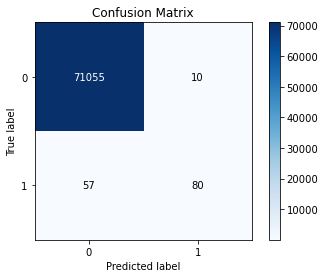

In [15]:
#getting accuracy and conf matrix 
#accurary score 
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy Score:", accuracy)

#creating confusion matrix [4]
skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels)

#creating second matrix to get TP/FP/TN/FN values 
conf_matrix = confusion_matrix(test_labels, predicted_labels)
TP = conf_matrix[1, 1] 
FP = conf_matrix[0, 1] 
TN = conf_matrix[0, 0]  
FN = conf_matrix[1, 0]  


#Chat GPT 3.5 accessed 04/08/2024 : 
#prompt {'skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels) how to access numbers in four quadrants of confusion matrix'}

#Output: 
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# import scikitplot as skplt

# Assuming test_labels and predicted_labels are your actual and predicted labels
# skplt.metrics.plot_confusion_matrix(test_labels, predicted_labels)
# plt.show()

# Extracting confusion matrix data from the plot
# cm = plt.gcf().get_children()[0].get_children()[1].get_children()[0].get_children()[1]._A

# Accessing TP, FP, TN, FN
# TP = cm[1, 1]  # True Positives
# FP = cm[0, 1]  # False Positives
# TN = cm[0, 0]  # True Negatives
# FN = cm[1, 0]  # False Negatives

# print("True Positives:", TP)
# print("False Positives:", FP)
# print("True Negatives:", TN)
# print("False Negatives:", FN)


In [16]:
#Results of model as percentages 
print(TN/(TN + FP) * 100, '% of Non Fraud Correctly Predicted')
print(FP/(TN + FP) * 100, '% of Non Fraud Incorrectly Predicted')
print(TP/(TP+FN) * 100, '% of Fraud Correctly Predicted')
print(FN/(TP+FN) * 100, '% of Fraud Incorrectly Predicted')


99.98592837543094 % of Non Fraud Correctly Predicted
0.014071624569056496 % of Non Fraud Incorrectly Predicted
58.3941605839416 % of Fraud Correctly Predicted
41.605839416058394 % of Fraud Incorrectly Predicted


**Test 2**

In [17]:
#logistic regression model 2  - feature reduction  
#taking statistically significant v columns if test 1 

#V1,V4,V8,V10,V13,V14,V20,V21,V22,V26,V27,V28 are statistically significant
classdf1= df1['Class']
features2 = df1[['V4','V5','V8', 'V10', 'V13', 'V14','V20', 'V21', 'V22', 'V23', 'V27', 'V28', 'Amount']]

#getting train and testing vectors, train and test labels
train_vectors2, test_vectors2, train_labels2, test_labels2 = train_test_split(features2,classdf1, test_size = 0.25, train_size =0.75)


In [18]:
#making log reg model and printing result
logit_model2 = sm.Logit(train_labels2, sm.add_constant(train_vectors2))
result2 = logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.003653
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               213605
Model:                          Logit   Df Residuals:                   213591
Method:                           MLE   Df Model:                           13
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.6977
Time:                        18:45:55   Log-Likelihood:                -780.38
converged:                       True   LL-Null:                       -2581.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9924      0.171    -52.645      0.000      -9.327      -8.658
V4             0.6736      0

In [19]:
#finding and printing predicted labels
predicted_probabilities2 = result2.predict(sm.add_constant(test_vectors2))
predicted_labels2 = (predicted_probabilities2 > 0.5).astype(int)
print("Predicted class labels for test data:")
print(predicted_labels2)

Predicted class labels for test data:
270656    0
178940    0
250539    0
265384    0
205393    0
         ..
14314     0
136201    0
82286     0
148571    0
3775      0
Length: 71202, dtype: int32


Accuracy Score: 0.9989747479003399


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

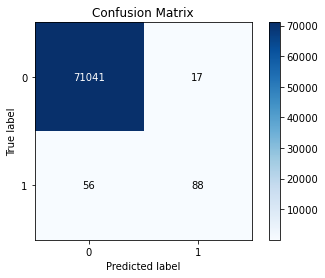

In [20]:
#accuracy score and confusion matrix [4]
accuracy2 = accuracy_score(test_labels2, predicted_labels2)
print("Accuracy Score:", accuracy2)
skplt.metrics.plot_confusion_matrix(test_labels2, predicted_labels2)

In [21]:
#creating second matrix to get TP/FP/TN/FN values
conf_matrix2 = confusion_matrix(test_labels2, predicted_labels2)
TP2 = conf_matrix2[1, 1]  # True Positives
FP2 = conf_matrix2[0, 1]  # False Positives
TN2 = conf_matrix2[0, 0]  # True Negatives
FN2 = conf_matrix2[1, 0]  

# results as percentages 
print(TN2/(TN2 + FP2) * 100, '% of Non Fraud Correctly Predicted')
print(FP2/(TN2 + FP2) * 100, '% of Non Fraud Incorrectly Predicted')
print(TP2/(TP2+FN2) * 100, '% of Fraud Correctly Predicted')
print(FN2/(TP2+FN2) * 100, '% of Fraud Incorrectly Predicted')

99.97607588167412 % of Non Fraud Correctly Predicted
0.023924118325874637 % of Non Fraud Incorrectly Predicted
61.111111111111114 % of Fraud Correctly Predicted
38.88888888888889 % of Fraud Incorrectly Predicted


**Test 3**

In [22]:
#logistic regression model 3
#class vs amount
classdf1= df1['Class']
feature3 = df1['Amount']

#getting train/test vectors and labels 
train_vectors3, test_vectors3, train_labels3, test_labels3 = train_test_split(feature3,classdf1, test_size = 0.25, train_size =0.75)

#creating log reg model 
logit_model3 = sm.Logit(train_labels3, sm.add_constant(train_vectors3))

#get/print results 
result3 = logit_model3.fit()
print(result3.summary())


Optimization terminated successfully.
         Current function value: 0.012585
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               213605
Model:                          Logit   Df Residuals:                   213603
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:               0.0008050
Time:                        18:46:42   Log-Likelihood:                -2688.3
converged:                       True   LL-Null:                       -2690.5
Covariance Type:            nonrobust   LLR p-value:                   0.03741
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3965      0.054   -119.406      0.000      -6.501      -6.291
Amount         0.0003   9.22

In [23]:
#getting/printing predicted labels 
predicted_probabilities3 = result3.predict(sm.add_constant(test_vectors3))
predicted_labels3 = (predicted_probabilities3 > 0.5).astype(int)
print("Predicted class labels for test data:")
print(predicted_labels3)

Predicted class labels for test data:
157365    0
88262     0
18114     0
158849    0
276532    0
         ..
158121    0
154999    0
55342     0
50579     0
245951    0
Length: 71202, dtype: int32


Accuracy Score: 0.9982022976882672


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

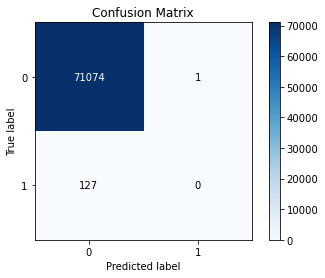

In [24]:
#printing accuracy score 
accuracy3 = accuracy_score(test_labels3, predicted_labels3)
print("Accuracy Score:", accuracy3)
#create confusion matrix [4]
skplt.metrics.plot_confusion_matrix(test_labels3, predicted_labels3)

In [26]:
#second conf. matrix to acccess TP/FP/TN/FN
conf_matrix3 = confusion_matrix(test_labels3, predicted_labels3)
TP3 = conf_matrix3[1, 1]  # True Positives
FP3 = conf_matrix3[0, 1]  # False Positives
TN3 = conf_matrix3[0, 0]  # True Negatives
FN3 = conf_matrix3[1, 0]  

#print results as percents 
print(TN3/(TN3 + FP3) * 100, '% of Non Fraud Correctly Predicted')
print(FP3/(TN3 + FP3) * 100, '% of Non Fraud Incorrectly Predicted')
print(TP3/(TP3+FN3) * 100, '% of Fraud Correctly Predicted')
print(FN3/(TP3+FN3) * 100, '% of Fraud Incorrectly Predicted')

99.99859303552586 % of Non Fraud Correctly Predicted
0.0014069644741470278 % of Non Fraud Incorrectly Predicted
0.0 % of Fraud Correctly Predicted
100.0 % of Fraud Incorrectly Predicted


**Analysis of Logistic Regression Model**

- Test 2 (significant features model) has the greatest accuracy score (around 0.99) and greatest percentage of correctly identified fraudulent transactions (more than 60%)
- For the best model, 60% is not a great percentage
- Using a log-reg model in the real world to identity fraudulent transactions is not very effective. More than 30% of fraudulent transactions would not be identified correctly 

 


*PROS*
- Quick running time 
- Easy to set-up

*CONS*
- Accuracy is not a good metric for this model. 
- While Test 3 has an accuracy score of .998, it did not classify any of the fraudulent values correctly
- Difficult to visualize beyond confusion matrices 


### Model 2: Random Forrest

Read the data again for random forest model to maintain data integrity over the notebook. 

In [4]:
df_random_forest = pd.read_csv('creditcard.csv1')
df_random_forest.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
seed = 42
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_random_forest.drop(["Class"], axis = 1), df_random_forest["Class"], test_size = 0.3, random_state = seed)

Data Fitting Process:

In [6]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

Prediction By the Model and Quantitative Evaluation of the Model:

In [7]:
y_pred_rf_classifier = rf_classifier.predict(X_test_rf) 

print(f"Accuracy Score: {accuracy_score(y_test_rf,y_pred_rf_classifier)}")
print(f"Recall Score: {recall_score(y_test_rf,y_pred_rf_classifier)}")
print(f"Precission Score: {precision_score(y_test_rf,y_pred_rf_classifier)}")
print(f"F1 Score: {f1_score(y_test_rf,y_pred_rf_classifier)}")

Accuracy Score: 0.9996254813150287
Recall Score: 0.8161764705882353
Precission Score: 0.940677966101695
F1 Score: 0.8740157480314961


The random forest model achieved an accuracy of 99.96%, indicating its effectiveness in classifying transactions. It captured 82.35% of fraudulent transactions (recall) and correctly identified fraud 92.56% of the time (precision). The F1 score, considering both precision and recall, was 87.16%, providing a balanced measure of the model's performance.

### Model 3: Naive Bayes Classifier 

Read the data again to maintain integrity:

In [39]:
df_nb = pd.read_csv('creditcard1.csv')
df_nb.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class as pie chart:


Text(0, 0.5, '')

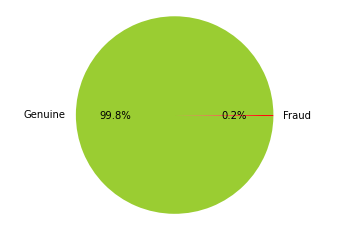

In [41]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df_nb.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

Distribution of transaction times between genuine and fraudulent transactions:

Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

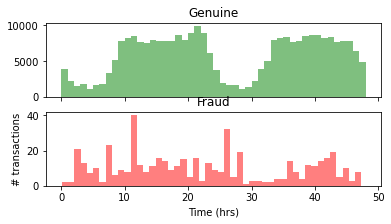

In [44]:
print("Time variable")
df_nb["Time_Hr"] = df_nb["Time"]/3600 
print(df_nb["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df_nb.Time_Hr[df_nb.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df_nb.Time_Hr[df_nb.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')
    

Visualization to compare the distribution of transaction amounts between genuine and fraudulent transactions:

In [45]:
df_nb = df_nb.drop(['Time'],axis=1)

Text(0, 0.5, '# transactions')

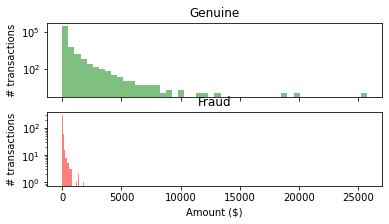

In [47]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df_nb.Amount[df_nb.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df_nb.Amount[df_nb.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [52]:
def split_data(df, drop_list):
    """
    Splits the DataFrame into features and target variables, and further splits the data into training and testing sets.

    @param df: The DataFrame containing the dataset.
    @param drop_list: A list of column names to drop from the DataFrame before splitting.

    @Returns: Four arrays representing the training features, testing features, training targets, and testing targets, respectively.
    """

    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [53]:
def get_predictions(clf, X_train, y_train, X_test):
    """
    Generates predictions using a classifier on the test data and computes predicted probabilities.

    @param clf: The classifier model.
    @param X_train: The features of the training set.
    @param y_train: The target labels of the training set.
    @param X_test: The features of the test set.

    @Returns: A tuple containing the predicted labels and predicted probabilities for the test set.
    """

    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [54]:
def print_scores(y_test,y_pred,y_pred_prob):
    """
    Prints evaluation scores including confusion matrix, recall score, precision score, F1 score, accuracy score, and ROC AUC score.

    @param y_test: The true labels of the test set.
    @param y_pred: The predicted labels for the test set.
    @param y_pred_prob: The predicted probabilities for the positive class (usually the second column) of the test set.

    @Returns: None
    """

    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [56]:
# case 1 normal
drop_list = []
X_train, X_test, y_train, y_test = split_data(df_nb, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Time_Hr'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[222480   4971]
 [    69    325]]
test-set confusion matrix:
 [[55535  1329]
 [   15    83]]
recall score:  0.8469387755102041
precision score:  0.058781869688385266
f1 score:  0.10993377483443707
accuracy score:  0.9764053228468101
ROC AUC: 0.963248599594593


In [57]:
# case 2 drop variables
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df_nb, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class', 'Time_Hr'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[223967   3484]
 [    61    333]]
test-set confusion matrix:
 [[55935   929]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08472906403940887
f1 score:  0.15453728661275834
accuracy score:  0.9834802148800955
ROC AUC: 0.9621895923535424


In [58]:
# case 3 drop variables + Time
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df_nb, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[223964   3487]
 [    60    334]]
test-set confusion matrix:
 [[55936   928]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08481262327416174
f1 score:  0.15467625899280577
accuracy score:  0.9834977704434535
ROC AUC: 0.9613549837492679


The model has an accuracy of around .97 and correctly identifies about 90% of all actual fraudulent transactions.

Overall, Naive Bayes Classifier produces a very good result and performance.  Despite variations in feature selection, the models consistently demonstrated high accuracy and robust performance in identifying fraudulent transactions. Moreover, the model's performance may degrade when applied to highly imbalanced datasets or when dealing with correlated features. Accordingly, when applying the model to real-world problems, we need to modify and implement fine tuning to produce to best results.

### Model 4: Principal Component Analysis

Read the data again to maintain integrity:

In [28]:
df_pca = pd.read_csv('creditcard1.csv')
df_pca.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
# Extract features 
features = df_pca.drop(['Class'], axis=1)

# Initialize a StandardScaler object to standardize the features
scaler = StandardScaler()

# Standardize the features 
features_scaled = scaler.fit_transform(features)

# Initialize a PCA (Principal Component Analysis) object to perform dimensionality reduction
pca = PCA(n_components=2)

# Apply PCA to reduce the dimensionality of the standardized features to 2 principal components
principalComponents = pca.fit_transform(features_scaled)

# Create a DataFrame to store the principal components 
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

principalDf


,principal component 1,principal component 2
0,0.422793,-2.488208
1,-0.390079,-2.108446
2,1.868886,-2.513924
3,0.303895,-1.794899
4,-0.011846,-1.482221
...,...,...
284802,-1.515322,1.954080
284803,-0.376970,0.808666
284804,-0.205202,2.060441
284805,-0.463997,1.284536


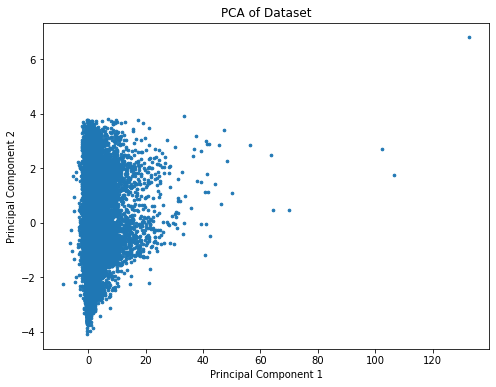

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], s=7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

In [33]:
# Calculate the mean and standard deviation of the principal component 1
mean_pc1 = np.mean(principalDf['principal component 1'])
std_pc1 = np.std(principalDf['principal component 1'])

# Calculate the mean and standard deviation of the principal component 2
mean_pc2 = np.mean(principalDf['principal component 2'])
std_pc2 = np.std(principalDf['principal component 2'])

# Set the threshold for outlier detection (usually a value such as 2 or 3)
threshold = 2

# Identify outliers for principal component 1 using the threshold
outliers_pc1 = principalDf[np.abs(principalDf['principal component 1'] - mean_pc1) > threshold * std_pc1]

# Identify outliers for principal component 2 using the threshold
outliers_pc2 = principalDf[np.abs(principalDf['principal component 2'] - mean_pc2) > threshold * std_pc2]

# Concatenate the outliers from both principal components, drop duplicates, and reset the index
outliers = pd.concat([outliers_pc1, outliers_pc2]).drop_duplicates().reset_index(drop=True)

# Get the number of outliers detected
num_outliers = outliers.shape[0]

# Get the total number of data points
total_points = principalDf.shape[0]

print(f'Number of potentially fraudulent outliers: {num_outliers} out of {total_points}')


Number of potentially fraudulent outliers: 12953 out of 284807


In [34]:
# Select the rows from the original features DataFrame (features)
outlier_features = features.loc[outliers.index]

# Standardize the outlier features using the same scaler previously fitted on the entire dataset
outliers_scaled = scaler.transform(outlier_features)

# Initialize a new PCA object with 2 principal components
pca = PCA(n_components=2)

# Apply PCA 
principalComponents_outliers = pca.fit_transform(outliers_scaled)

# Create a new DataFrame 'principalDf_outliers' to store the 2 principal components of the outliers
principalDf_outliers = pd.DataFrame(data=principalComponents_outliers, 
                                    columns=['principal component 1', 'principal component 2'])


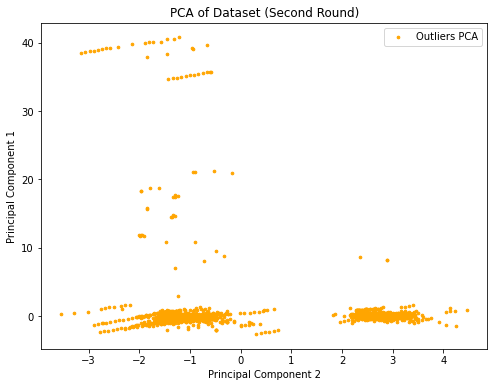

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(principalDf_outliers['principal component 2'], principalDf_outliers['principal component 1'], 
            color='orange', label='Outliers PCA', s=7)

plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 1')
plt.title('PCA of Dataset (Second Round)')
plt.legend()
plt.show()

In [36]:
# Calculate the mean and standard deviation of the principal component 1 for the outliers
mean_pc1_outliers = np.mean(principalDf_outliers['principal component 1'])
std_pc1_outliers = np.std(principalDf_outliers['principal component 1'])

# Calculate the mean and standard deviation of the principal component 2 for the outliers
mean_pc2_outliers = np.mean(principalDf_outliers['principal component 2'])
std_pc2_outliers = np.std(principalDf_outliers['principal component 2'])

threshold = 1

# Identify further outliers
further_outliers_pc1 = principalDf_outliers[np.abs(principalDf_outliers['principal component 1'] - mean_pc1_outliers) > threshold * std_pc1_outliers]
further_outliers_pc2 = principalDf_outliers[np.abs(principalDf_outliers['principal component 2'] - mean_pc2_outliers) > threshold * std_pc2_outliers]

# Concatenate 
further_outliers = pd.concat([further_outliers_pc1, further_outliers_pc2]).drop_duplicates().reset_index(drop=True)

# Get the number of further outliers detected
num_further_outliers = further_outliers.shape[0]

# Get the total number of points in the outlier dataset
total_points_in_outliers = principalDf_outliers.shape[0]

print(f'Number of potentially fraudulent outliers after further analysis: {num_further_outliers} out of {total_points_in_outliers} and {total_points} total')


Number of potentially fraudulent outliers after further analysis: 4061 out of 12953 and 284807 total


In [37]:
# Calculate the mean and standard deviation of the principal component
mean_pc1_further = np.mean(further_outliers['principal component 1'])
std_pc1_further = np.std(further_outliers['principal component 1'])
mean_pc2_further = np.mean(further_outliers['principal component 2'])
std_pc2_further = np.std(further_outliers['principal component 2'])

threshold_further = .6  

# Identify extreme outliers
extreme_outliers_pc1 = further_outliers[np.abs(further_outliers['principal component 1'] - mean_pc1_further) > threshold_further * std_pc1_further]
extreme_outliers_pc2 = further_outliers[np.abs(further_outliers['principal component 2'] - mean_pc2_further) > threshold_further * std_pc2_further]

extreme_outliers = pd.concat([extreme_outliers_pc1, extreme_outliers_pc2]).drop_duplicates().reset_index(drop=True)

num_extreme_outliers = extreme_outliers.shape[0]
total_points_in_further_outliers = further_outliers.shape[0]

print(f'Number of extreme outliers after further analysis: {num_extreme_outliers} out of {total_points_in_further_outliers}')

Number of extreme outliers after further analysis: 587 out of 4061


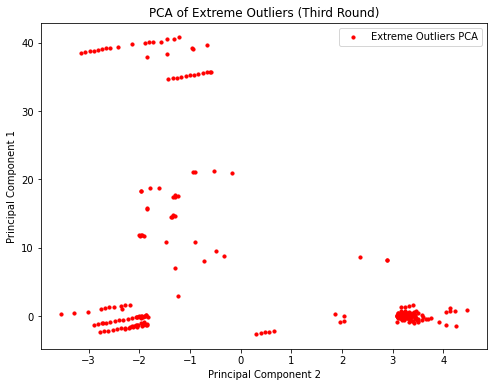

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(extreme_outliers['principal component 2'], extreme_outliers['principal component 1'], 
            color='red', label='Extreme Outliers PCA', s=10)  

plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 1')
plt.title('PCA of Extreme Outliers (Third Round)')
plt.legend()
plt.show()

The credit cards that are screened out during the second round (around 4,000) will be shut down while the cardholder is notified. The credit cards that are screened out during the third round (606) will be even more urgently shut down and notified. In scenarios as serious as credit card transactions I believe that it is best to air on the side of caution. By stopping and notifying cardholders in both rounds we ensure that there is a very small probability that fraudulent cases get through. I know we are airing on the side of caution because there are only around 490 frauds out of 284,807 transactions. This gives us an accuracy rating in the third round of around 81.1%. 


## Discussion & Analysis

Each of the four machine learning models employed in the project has its strengths and weaknesses. For example, Logistic Regression is simple to implement and produce a good performance although it is not the best. Naive Bayes Classifier requires the understading of math concepts and concise code implementations. PCA can be useful for dimensionality reduction, but it may discard important information. Random Forest demonstrated high accuracy but may lack interpretability due to its ensemble nature.

The challenges we encountered is in the data processing and developing computational model. Model’s performance requires high data quality and careful data processing. Moreover, credit card fraud is a relatively rare event, posing difficulty in developing model and algorithms to detect the credit card fraud.


## Conclusion

Credit fraud poses a significant threat to both consumers and financial institutions, with a high number of reported cases annually. In this project, we aimed to identify the most effective machine learning model for detecting fraudulent transactions. Leveraging libraries such as scikit-learn, statsmodels, seaborn, pandas, numpy, and matplotlib, we analyzed data collected through a collaboration between Worldline and ULB (Université Libre de Bruxelles). Four machine learning models were explored: Logistic Regression, Principal Component Analysis (PCA), Naive Bayes Classifier, and Random Forest.

The best model for detecting fraud in Credit Transactions is the Random Forest Model. The random forest model has the strongest performance due to its high accuracy, robustness to overfitting, and ability to handle large and complex datasets, and it is the model we would recommend to banking instutions. Our study underscores the importance of employing machine-learning techniques for effective credit fraud detection, safeguarding consumers, preserving trust in financial systems.

## Reference

1. Experian, "What Is Credit Fraud?," Experian, Sep. 30, 2020. [Online]. Available: https://www.experian.com/blogs/ask-experian/credit-education/preventing-fraud/what-is-credit-fraud/
2. DataVisor. (n.d.). Credit Card Fraud: Everything You Need to Know. Retrieved from https://www.datavisor.com/wiki/credit-card-fraud/#:~:text=One%20of%20the%20most%20common,most%20common%20forms%20of%20payment
3. MLG - ULB and Worldline, "Credit Card Fraud Detection" [Dataset], Kaggle, Accessed September 2013. [Online]. Available: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
4. Marcelo Cotinda. (2020, March). Creditcard Fraud - Logistic Regression example. Retrieved from https://www.kaggle.com/code/marcelotc/creditcard-fraud-logistic-regression-example.